In [2]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


## Data Preparation


In [25]:
ratings = pd.read_csv('./dataset/data.csv')
movie_and_genre = pd.read_csv('./dataset/item.csv')
#movie_and_genre.head()

In [27]:
ratings.head()

,user id,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [26]:
#dropping columns: video release date, IMDb URL from movie_and_genre
movie_and_genre.drop(['video release date', 'IMDb URL'], axis=1, inplace=True)
movie_and_genre.head()

,movie_id,movie title,release date,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-01-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-01-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-01-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-01-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-01-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [28]:
#converting ratings timestamp to datetime
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s')
ratings.head()

,user id,movie_id,rating,timestamp
0,196,242,3,1997-12-04 15:55:49
1,186,302,3,1998-04-04 19:22:22
2,22,377,1,1997-11-07 07:18:36
3,244,51,2,1997-11-27 05:02:03
4,166,346,1,1998-02-02 05:33:16


In [12]:
#a function returning DF with movie_id, movie title, genres, average_rating and number_of_ratings
def movie_rating_df(ratings, movie_and_genre):
    movie_rating = pd.merge(ratings, movie_and_genre, on='movie_id')
    movie_rating = movie_rating.groupby('movie title')['rating'].agg(['mean', 'count'])
    movie_rating.columns = ['average_rating', 'number_of_ratings']
    movie_rating = pd.merge(movie_rating, movie_and_genre, on='movie title')
    movie_rating = movie_rating.drop_duplicates(subset='movie title')
    return movie_rating


In [29]:
ratings_avg_and_count = movie_rating_df(ratings, movie_and_genre)

## Data Exploration and Visualization

### Distributions

<AxesSubplot:xlabel='rating', ylabel='Count'>

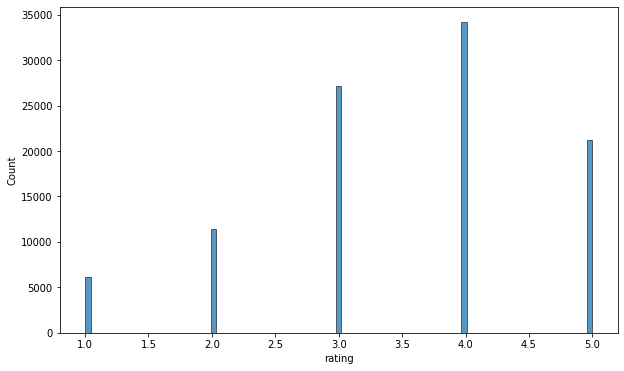

In [40]:
#Distribution of ratings
plt.figure(figsize=(10,6))
sns.histplot(ratings['rating'])

<AxesSubplot:xlabel='average_rating', ylabel='Count'>

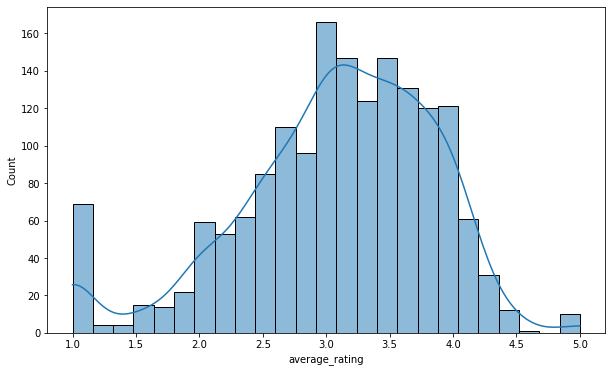

In [42]:
#Distribution of average ratings
plt.figure(figsize=(10,6))
sns.histplot(ratings_avg_and_count['average_rating'],kde=True)


<AxesSubplot:xlabel='number_of_ratings', ylabel='Count'>

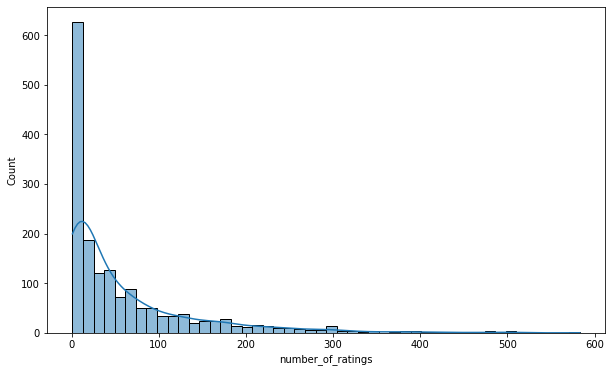

In [43]:
#Distribution of number of ratings
plt.figure(figsize=(10,6))
sns.histplot(ratings_avg_and_count['number_of_ratings'],kde=True)

<Figure size 720x432 with 0 Axes>

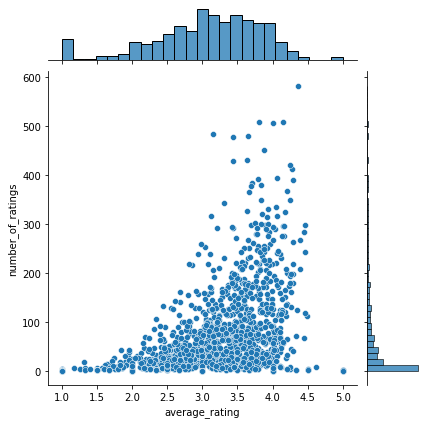

In [47]:
#Distribution of average ratings and number of ratings
plt.figure(figsize=(10,6))
#sns.scatterplot(x='average_rating', y='number_of_ratings', data=ratings_avg_and_count)
sns.jointplot(x='average_rating', y='number_of_ratings', data=ratings_avg_and_count, kind='scatter')

In [60]:
#Removing movies with less than 50 ratings
ratings_avg_and_count = ratings_avg_and_count[ratings_avg_and_count['number_of_ratings'] > 50]

<Figure size 720x432 with 0 Axes>

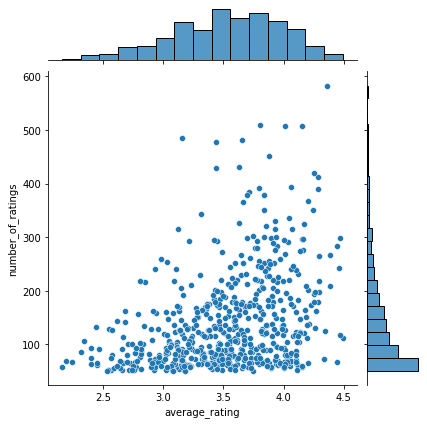

In [62]:
#Distribution of average ratings and number of ratings
plt.figure(figsize=(10,6))
#sns.scatterplot(x='average_rating', y='number_of_ratings', data=ratings_avg_and_count)
sns.jointplot(x='average_rating', y='number_of_ratings', data=ratings_avg_and_count, kind='scatter')

In [65]:
#saving the ratings_avg_and_count DF to csv 
ratings_avg_and_count.to_csv('./dataset/ratings_avg_and_count.csv', index=False)

In [66]:
#saving the ratings DF to csv
ratings.to_csv('./dataset/ratings_timestamp_formatted.csv', index=False)

### Temporal Patterns

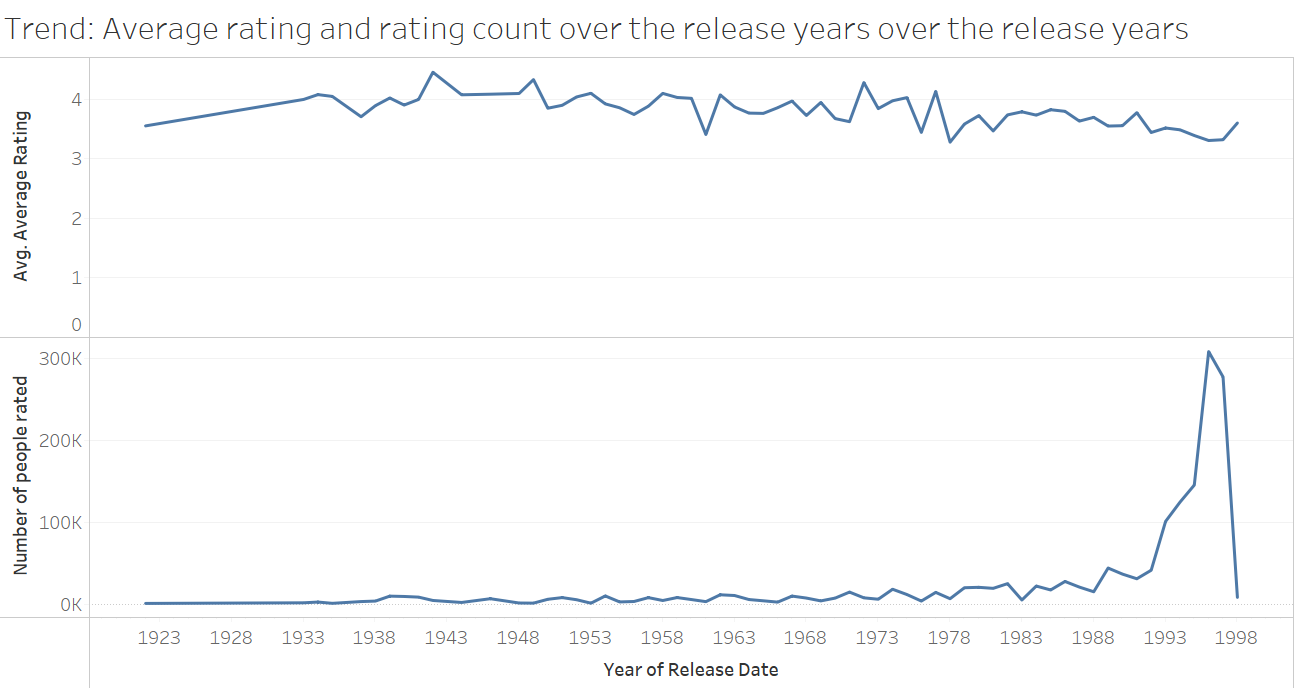

In [71]:
Image(filename='figures\Trend Average rating and rating count over the release years over the release years.png')

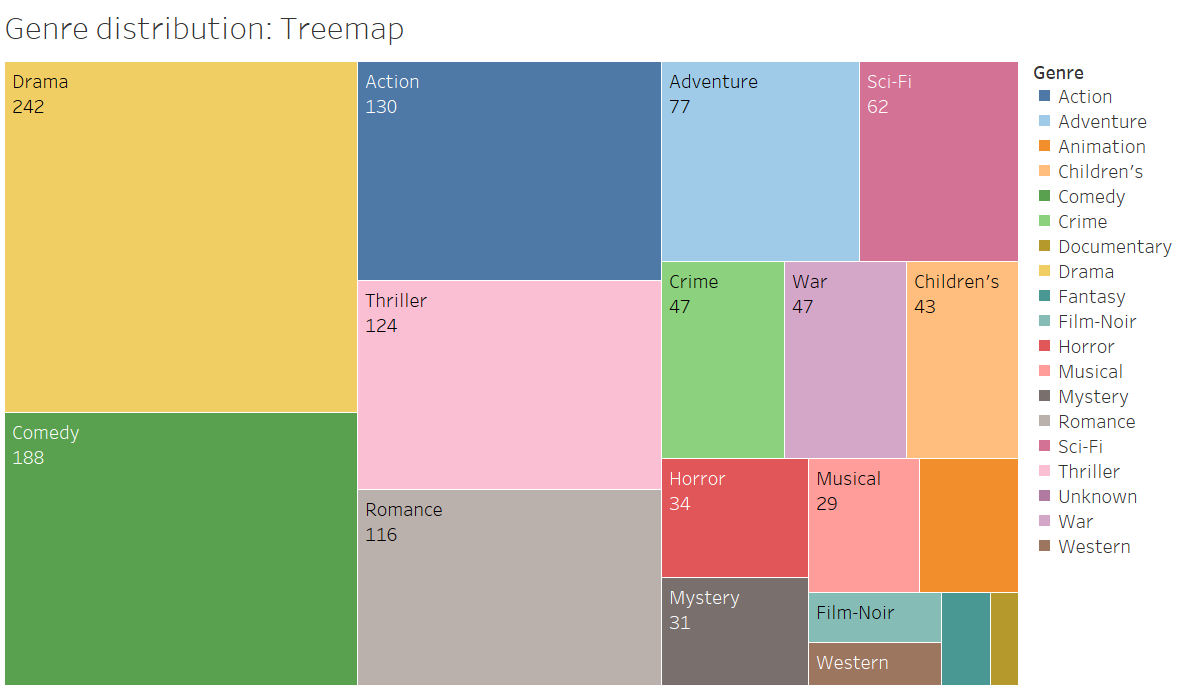

In [70]:
#embedding images in notebook
from IPython.display import Image
Image(filename='figures\Genre distribution Treemap.png')

## Genre Analysis

In [81]:
ratings_avg_and_count.columns[5:]

Index([' unknown', 'Action', 'Adventure', ' Animation', ' Children's',
       'Comedy ', 'Crime', 'Documentary', ' Drama ', 'Fantasy', ' Film-Noir',
       'Horror', 'Musical', ' Mystery', ' Romance', 'Sci-Fi', 'Thriller',
       'War', 'Western'],
      dtype='object')

In [78]:
#Finding the most popular genre based on the number of ratings and average rating

def popular_genre(ratings_avg_and_count):
    '''
    This function computes the popularity genre based on the number of ratings and average rating.
    popularity_genre = (average_rating * number_of_ratings) / number_of
    '''
    #getting the list of genres
    genre_list = ratings_avg_and_count.columns[5:]

    

,movie title,average_rating,number_of_ratings,movie_id,release date,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
9,"39 Steps, The (1935)",4.050847,59,615,01-01-1935,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
15,Absolute Power (1997),3.370079,127,291,14-02-1997,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
16,"Abyss, The (1989)",3.589404,151,164,01-01-1989,0,1,1,0,0,...,0,0,0,0,0,0,1,1,0,0
17,Ace Ventura: Pet Detective (1994),3.048544,103,67,01-01-1994,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20,Addams Family Values (1993),2.816092,87,386,01-01-1993,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1662,"Wizard of Oz, The (1939)",4.077236,246,132,01-01-1939,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
1663,Wolf (1994),2.701493,67,569,01-01-1994,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1670,"Wrong Trousers, The (1993)",4.466102,118,169,01-01-1993,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1675,Young Frankenstein (1974),3.945000,200,208,01-01-1974,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
